In [497]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os
import soundfile
import librosa
from collections import defaultdict
import pandas as pd

Sample rate of the audio file:  8000


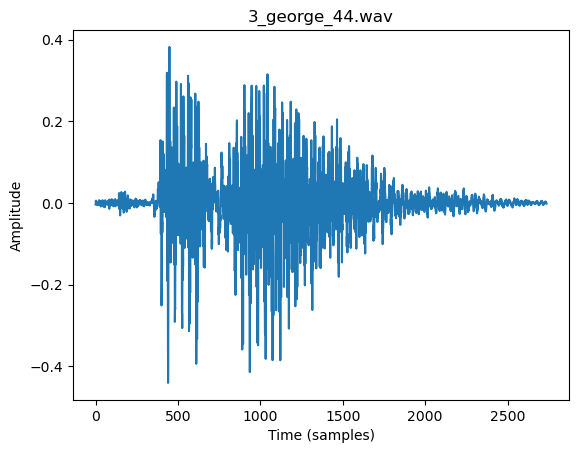

In [498]:
#folder_path = "data/audio/fold1"
folder_path = "data/audioMNIST/data"
# Get a list of all files in the folder_path
all_files = os.listdir(folder_path)

# Sample 3 files from the list
sample_file = np.random.choice(all_files, size=1, replace=False)

sr , _ = wavfile.read(folder_path + "/" + sample_file[0])
print("Sample rate of the audio file: ", sr)
y, sr = librosa.load(folder_path + "/" + sample_file[0], sr=sr)
plt.plot(y);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');


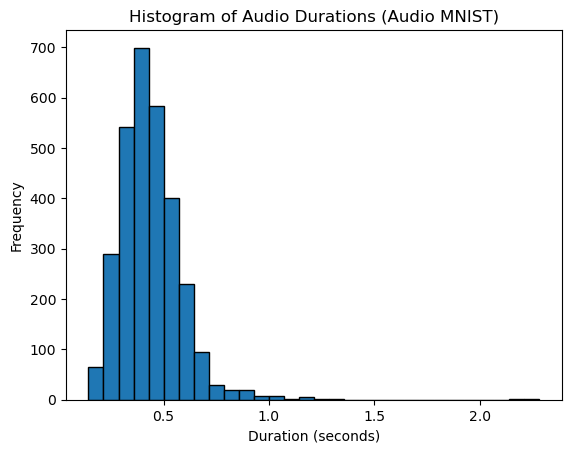

In [499]:
folder_path = "data/audioMNIST/data/"
        
durations = [len(librosa.load(folder_path+file, sr=sr)[0])/sr for file in all_files if file.endswith('.wav')]

plt.hist(durations, bins=30, edgecolor='black')
plt.title('Histogram of Audio Durations (Audio MNIST)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [500]:
def load_data(folder_path):
    # Get a list of all files in the folder_path
    all_files = os.listdir(folder_path)

    # Determine samplerate of signal
    sr , _ = wavfile.read(folder_path + "/" + all_files[0])

    audio_data = []
    # Load the audio files
    for file in all_files:
        if file.endswith('.wav'):
            y = librosa.load(folder_path + "/" + file, sr=sr)[0]
        audio_data.append((y,file))

    return audio_data

def remove_long_audio(audio_data, max_duration):
    # Remove audio clips longer than max_duration
    audio_data = [(y,file) for y,file in audio_data if len(y) <= max_duration]
    return audio_data

def trim_signals(audio_data, max_db):
    trimmed_audio = []
    for y, file in audio_data:
        y_trimmed, _ = librosa.effects.trim(y, top_db=max_db)
        trimmed_audio.append((y_trimmed, file))
    return trimmed_audio


In [501]:
audio_data = load_data(folder_path)

In [502]:
audio_data = remove_long_audio(audio_data, max_duration=8000)
max_samples = np.max([len(y) for y, _ in audio_data])
print("Max samples: ", max_samples)

Max samples:  7999


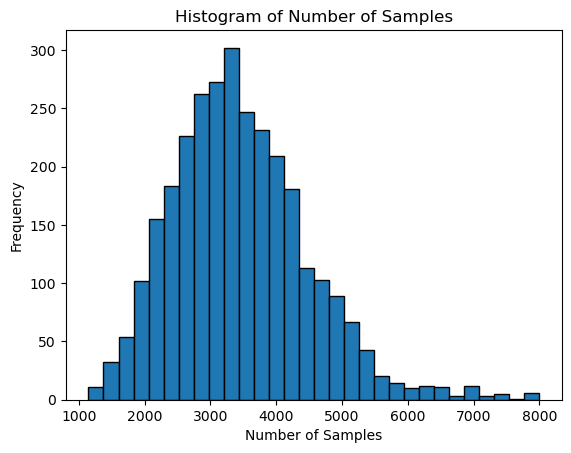

In [503]:
# Extract the number of samples for each audio file
num_samples = [len(audio[0]) for audio in audio_data]

# Plot the histogram
plt.hist(num_samples, bins=30, edgecolor='black')
plt.title('Histogram of Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Frequency')
plt.show()

In [504]:
audio_data = trim_signals(audio_data, max_db=20)

In [505]:
max_samples = np.max([len(y) for y, _ in audio_data])
print("Max samples: ", max_samples)

Max samples:  6457


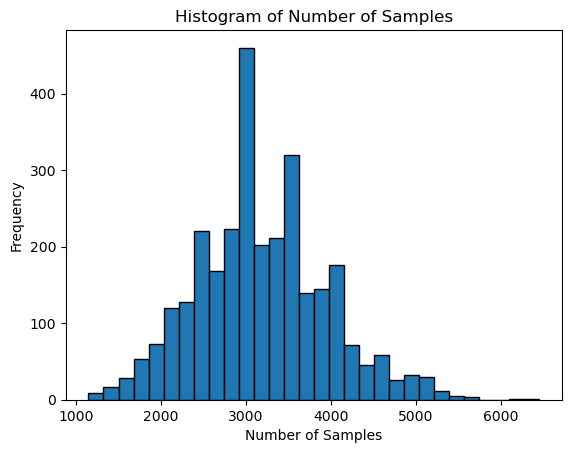

In [506]:
# Extract the number of samples for each audio file
num_samples = [len(audio[0]) for audio in audio_data]

# Plot the histogram
plt.hist(num_samples, bins=30, edgecolor='black')
plt.title('Histogram of Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Frequency')
plt.show()

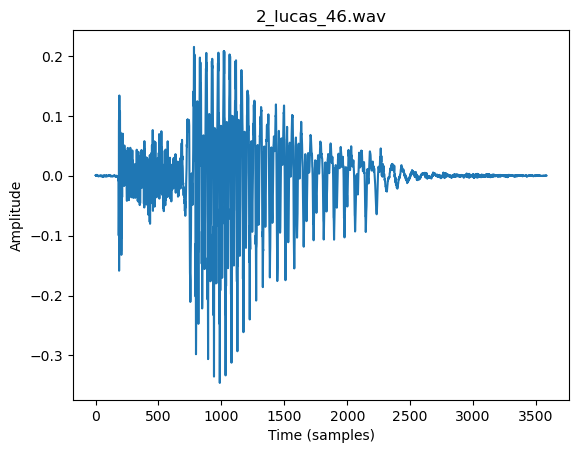

In [361]:
y_trimmed = librosa.effects.trim(y, top_db=20)

plt.plot(y_trimmed[0]);
plt.title(sample_file[0]);
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [362]:
output_file_path = "output_trimmed.wav"
soundfile.write(output_file_path, y_trimmed[0], sr)
print(f"Trimmed audio saved to {output_file_path}")

Trimmed audio saved to output_trimmed.wav


In [7]:
# Calculate mean and standard deviation of the audio data
audio_means = [np.mean(audio[0]) for audio in audio_data]
audio_stds = [np.std(audio[0]) for audio in audio_data]
audio_means_abs = [np.mean(np.abs(audio[0])) for audio in audio_data]
mean_of_means = np.mean(audio_means)
std_of_stds = np.mean(audio_stds)
# Calculate the maximum amplitude of each audio file
max_amplitudes = [np.max(np.abs(audio[0])) for audio in audio_data]
mean_aplitude = np.mean(max_amplitudes)

print(f"Mean of audio means: {mean_of_means}")
print(f"Mean of audio standard deviations: {std_of_stds}")
print(f"Mean of max amplitude: {np.max(max_amplitudes)}")



Mean of audio means: -0.001221716171130538
Mean of audio standard deviations: 0.047280699014663696
Mean of max amplitude: 1.0


In [16]:
# Initialize dictionary to hold stats, including durations
stats_by_class = defaultdict(lambda: {
    'means': [],
    'stds': [],
    'max_amplitudes': [],
    'durations': []
})

# Process each tuple
for y, name_of_file in audio_data:
    class_label = name_of_file[0]
    if class_label.isdigit():
        mean_val = np.mean(y)
        std_val = np.std(y)
        max_amplitude = np.max(np.abs(y))
        duration = len(y)  # Duration as the number of samples
        
        stats_by_class[class_label]['means'].append(mean_val)
        stats_by_class[class_label]['stds'].append(std_val)
        stats_by_class[class_label]['max_amplitudes'].append(max_amplitude)
        stats_by_class[class_label]['durations'].append(duration)
    else:
        print(f"Warning: File name '{name_of_file}' does not start with a digit. Skipping.")

# Ensure all classes '0' to '9' are represented
all_classes = [str(i) for i in range(10)]  # Classes '0' to '9'

# Re-initialize lists
classes = []
mean_of_means = []
mean_of_stds = []
mean_of_max_amplitudes = []
average_durations = []

for class_label in all_classes:
    classes.append(class_label)
    if class_label in stats_by_class:
        mean_of_means.append(np.mean(stats_by_class[class_label]['means']))
        mean_of_stds.append(np.mean(stats_by_class[class_label]['stds']))
        mean_of_max_amplitudes.append(np.max(stats_by_class[class_label]['max_amplitudes']))
        average_durations.append(np.mean(stats_by_class[class_label]['durations'])/sr)
    else:
        mean_of_means.append(np.nan)
        mean_of_stds.append(np.nan)
        mean_of_max_amplitudes.append(np.nan)
        average_durations.append(np.nan)

# Create DataFrame with all classes
df_stats = pd.DataFrame({
    'Class': classes,
    'Mean of Means': mean_of_means,
    'Mean of Stds': mean_of_stds,
    'Max Amplitudes': mean_of_max_amplitudes,
    'Average Duration': average_durations
})

# Calculate overall statistics, ignoring NaN values
overall_mean_of_means = np.nanmean(df_stats['Mean of Means'])
overall_mean_of_stds = np.nanmean(df_stats['Mean of Stds'])
overall_mean_of_max_amplitudes = np.max(df_stats['Max Amplitudes'])
overall_average_duration = np.nanmean(df_stats['Average Duration'])

# Create a dictionary for the overall row
overall_row = {
    'Class': 'Overall',
    'Mean of Means': overall_mean_of_means,
    'Mean of Stds': overall_mean_of_stds,
    'Max Amplitudes': overall_mean_of_max_amplitudes,
    'Average Duration': overall_average_duration
}

# Append the overall row using pd.concat
overall_df = pd.DataFrame([overall_row])
df_stats = pd.concat([df_stats, overall_df], ignore_index=True)

# Display the final DataFrame
print(df_stats, )

      Class  Mean of Means  Mean of Stds  Max Amplitudes  Average Duration
0         0      -0.001297      0.050386        0.969849          0.501801
1         1      -0.001213      0.044764        0.817474          0.403505
2         2      -0.001186      0.041472        0.489624          0.381141
3         3      -0.001191      0.043788        0.593170          0.394377
4         4      -0.001180      0.061896        0.690735          0.405900
5         5      -0.001179      0.052938        0.961426          0.448937
6         6      -0.001182      0.041685        1.000000          0.448528
7         7      -0.001211      0.042613        0.753876          0.444245
8         8      -0.001268      0.050755        0.894165          0.408432
9         9      -0.001310      0.042420        0.955109          0.483614
10  Overall      -0.001222      0.047272        1.000000          0.432048


In [10]:
def pad_signal(S, max_length):
    dif_sample = abs(len(S) - max_length) # Calculate the differnce in desired signal length and the current signal length

    if len(S) % 2 != 0:
        padded_y = np.pad(S, (dif_sample//2, dif_sample//2 + 1), 'constant', constant_values=(0, 0))
    else:
        padded_y = np.pad(S, (dif_sample//2, dif_sample//2), 'constant', constant_values=(0, 0))

    return padded_y

In [11]:
audio_data_padded = [(pad_signal(audio[0], 8000), audio[1]) for audio in audio_data]

In [12]:
print(len(audio_data_padded))

2980


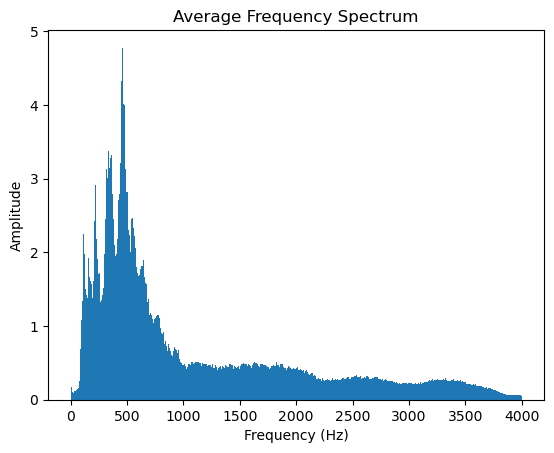

In [13]:

# Assuming 'waveforms' is a list or array of individual waveforms
spectra = []

for waveform in audio_data_padded:
    # Optional: Remove DC component (mean subtraction)
    #waveform = waveform[0] - np.mean(waveform[0])
    
    # Perform Fourier Transform
    spectrum = np.fft.fft(waveform[0])
    amplitude = np.abs(spectrum) / len(waveform)
    
    # Store the amplitude spectrum
    spectra.append(amplitude)

# print(spectra)
# Convert the list of spectra to a NumPy array for easy averaging
spectra = np.array(spectra)

# Compute the average spectrum
avg_spectrum = np.mean(spectra, axis=0)

# Plot the average frequency spectrum
frequencies = np.fft.fftfreq(len(avg_spectrum), 1/8000)  # Frequency bins
plt.bar(frequencies[:len(frequencies)//2], avg_spectrum[:len(avg_spectrum)//2], width=frequencies[1]-frequencies[0])
plt.title('Average Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()